# BT2103 Project

## Introduction: 
The data set contains payment information of 30,000 credit card holders obtained from a bank in Taiwan. Each data sample is described by 23 feature attributes (columns B to X). The target feature (column Y) to be predicted is binary valued 0 (= not default) or 1 (= default).

We aim to predict whether a credit card holder is able to make payment in the next month (1 = yes , 0 = no)

There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)




## Importing Relevant Libaries

In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats

## Exploratory Data Analysis

In [2]:
df = pd.read_csv('card.csv',header=[1])

In [3]:
# Get a glimpse of the data
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Let's see the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
## Statistics of data
## Here we can check if there are values that are potentially out of range in the variable.
## such as education - supposed to only have values from 1 to 4, but in this case there were occurrences 
## out of the range.
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


From the statistics above, there is no missing data/null data in our dataset but there are several anomalies that we have to deal with later on.
- EDUCATION has categories 0, 5 and 6 that are not part of the labels.
- MARRIAGE has a category 0 that is not part of the labels.

In [6]:
## Do we still need this since on top we already have information that our data is non-null.

## Here we check for null values in the dataframe since it needs to be handled if we require the 
## variable that contains null values.
df.isnull().sum()
## No missing values since sum all 0  

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
# Create another column with a clearer header for defaulters
df['Defaulter'] = df['default payment next month']

In [8]:
## DROP ID COLUMN as there are independent and identically distributed variables that are not correlated to `default payment next month` variable

df = df.drop("ID", axis = 1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Defaulter
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0


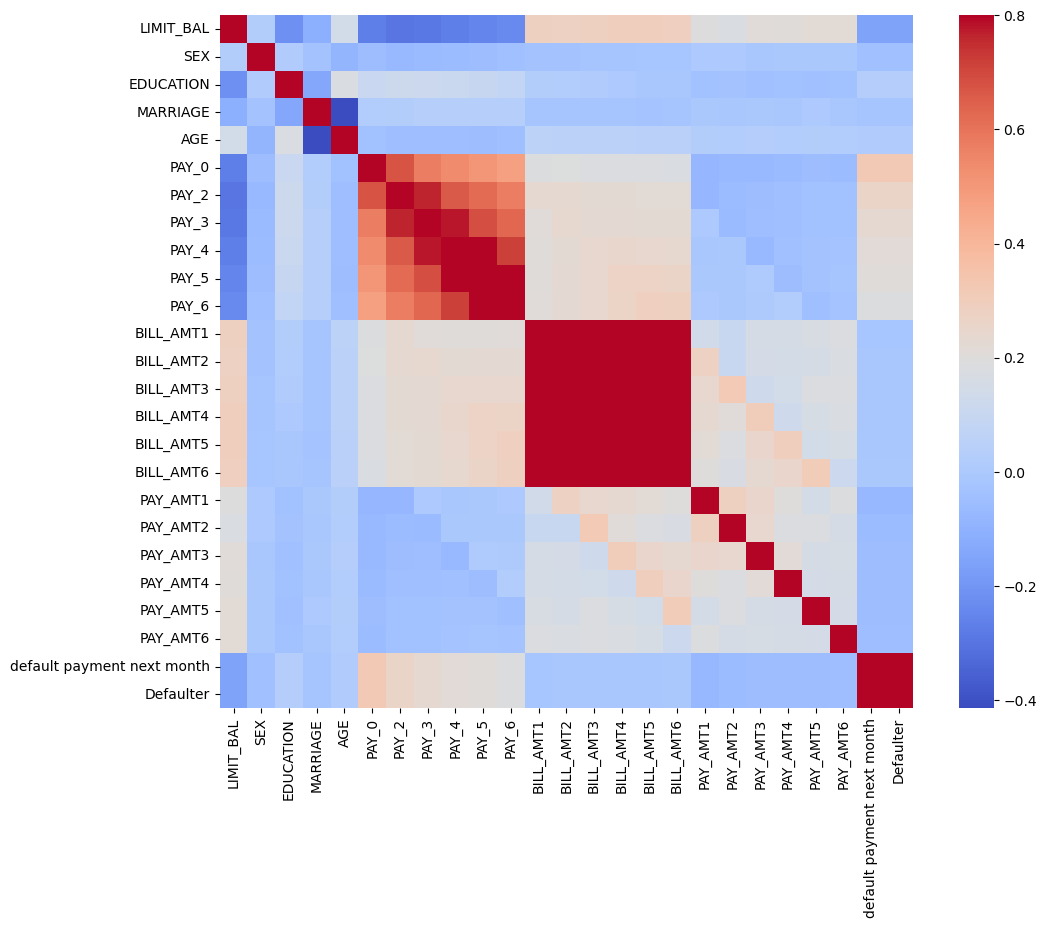

In [9]:
## Correlation of the variables
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True, cmap = "coolwarm")
plt.show()

## From this, we can see that the variables that have slightly higher correlation are 
## LIMIT_BAL, PAY_AMT1 to PAY_AMT6
## With that in mind, let's dive deeper into those variables.

### Analysis on Age of Credit Card Holders

In [10]:
df['AGE'].describe() ## all credit card holders are above the age of 21, and below the age of 79

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

Text(0.5, 1.0, 'Age distribution')

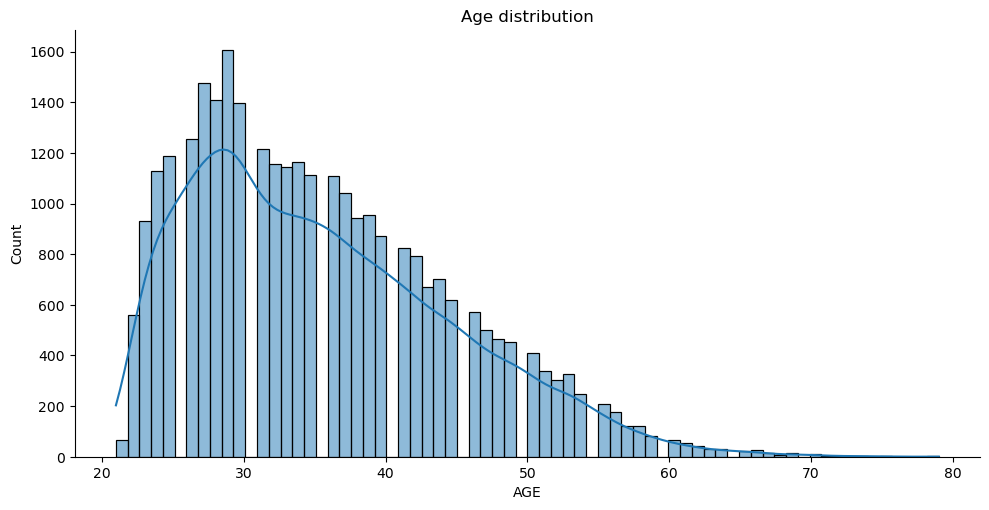

In [11]:
## Distribution plot of AGE
sns.displot(x='AGE', data = df, kde=True, aspect=2)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Age distribution")

### Analysis on Marital Status of Credit Card Holders

In [12]:
df['MARRIAGE'].describe()

count    30000.000000
mean         1.551867
std          0.521970
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: MARRIAGE, dtype: float64

<AxesSubplot:>

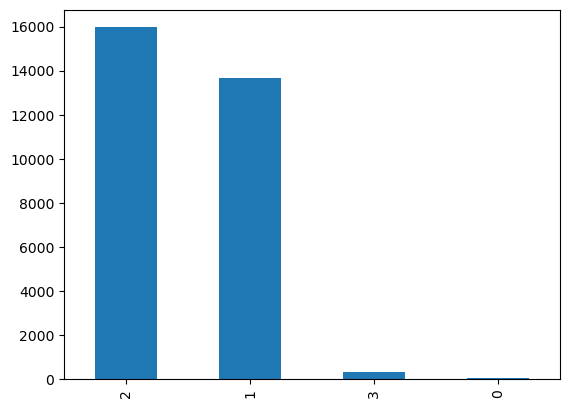

In [13]:
df.MARRIAGE.value_counts().plot(kind = 'bar') ## have 0 values

In [14]:
# The value 0 does not represent any category of marriage. 
# Hence, I am going to map 0 to 3, to categorise it under others.
df['MARRIAGE'].replace({0:3,1:1,2:2,3:3}, inplace=True)
df['MARRIAGE'].value_counts()


2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

<Figure size 1000x500 with 0 Axes>

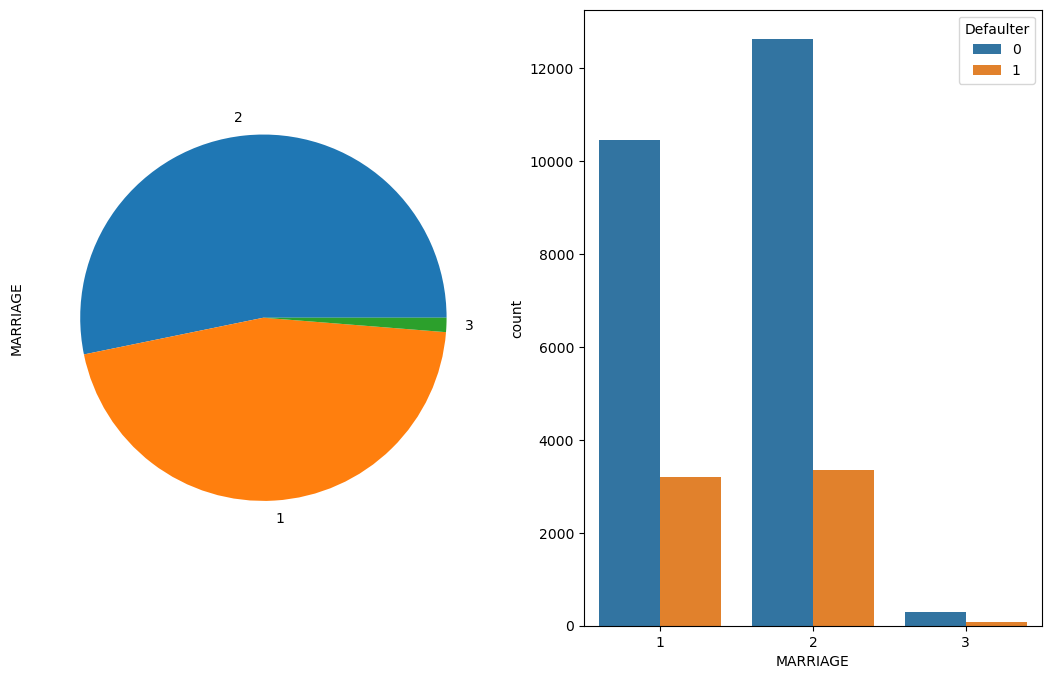

In [15]:
# Plotting pie chart and bar chart to see how the marital status of an individual is correlated to whether the individual defaults
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(ncols=2,figsize=(13,8))
df['MARRIAGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.countplot(x = 'MARRIAGE', hue = 'Defaulter', data = df)

From the pie chart and bar graph above, we can see that the highest proportion of defaulters are Single, followed by Married then Others.

### Analysis on Education of Credit Card Holders

<AxesSubplot:>

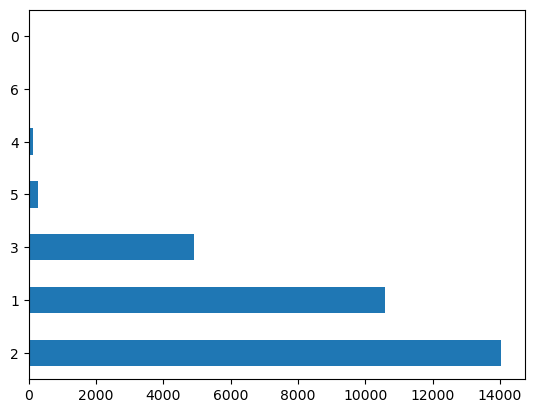

In [16]:
df.EDUCATION.value_counts().plot(kind = "barh")

In [17]:
# From the Data Description given, we know that in df.EDUCATION, 5 and 6 represents "unknown" 
# Changing 0,5 and 6 to keep it under 1 category.

## why don't we change it to others?

df['EDUCATION'].replace({0:1,1:1,2:2,3:3,4:4,5:1,6:1}, inplace=True)
df.EDUCATION.value_counts()

2    14030
1    10930
3     4917
4      123
Name: EDUCATION, dtype: int64

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

<Figure size 1000x500 with 0 Axes>

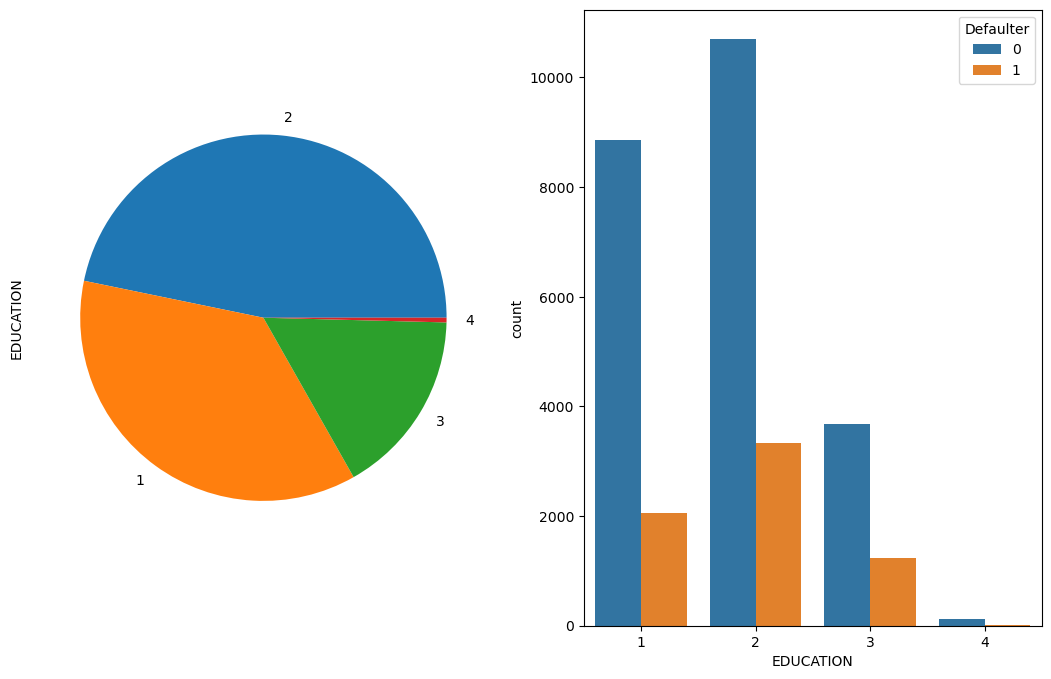

In [18]:
# Plotting pie chart and bar chart to see how the the education of an individual is correlated to whether the individual defaults
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(ncols=2,figsize=(13,8))
df['EDUCATION'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.countplot(x = 'EDUCATION', hue = 'Defaulter', data = df)

From the pie chart and bar graph above, we can see that 

### Analysis on Gender of Credit Card Holders

<AxesSubplot:>

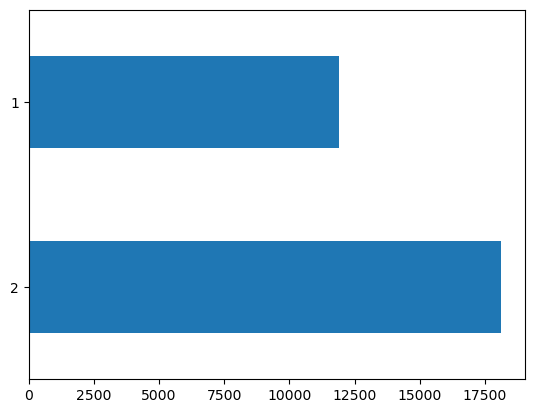

In [19]:
df.SEX.value_counts().plot(kind = "barh")

<AxesSubplot:xlabel='SEX', ylabel='count'>

<Figure size 1000x500 with 0 Axes>

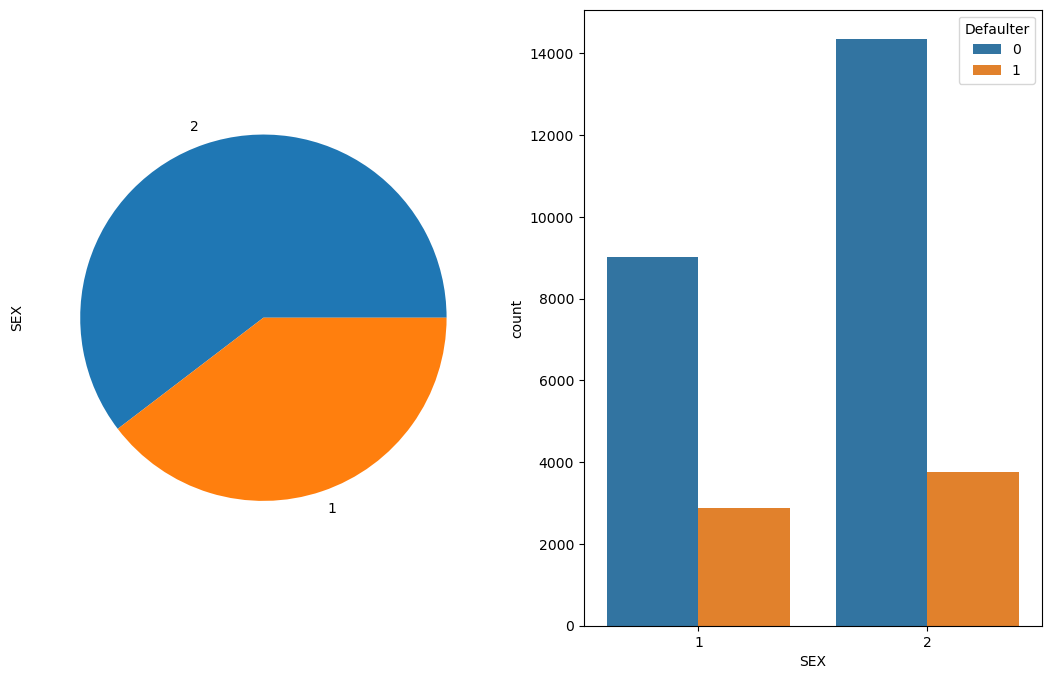

In [20]:
# Plotting pie chart and bar chart to see how the the education of an individual is correlated to whether the individual defaults
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(ncols=2,figsize=(13,8))
df['SEX'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.countplot(x = 'SEX', hue = 'Defaulter', data = df)

From the pie chart and bar graph above, we can see that the number of defaulters has a higher proportion of females.

### Analysis on Amount of Given Credit of Credit Card Holders


In [21]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

Text(0.5, 1.0, 'Credit Distribution')

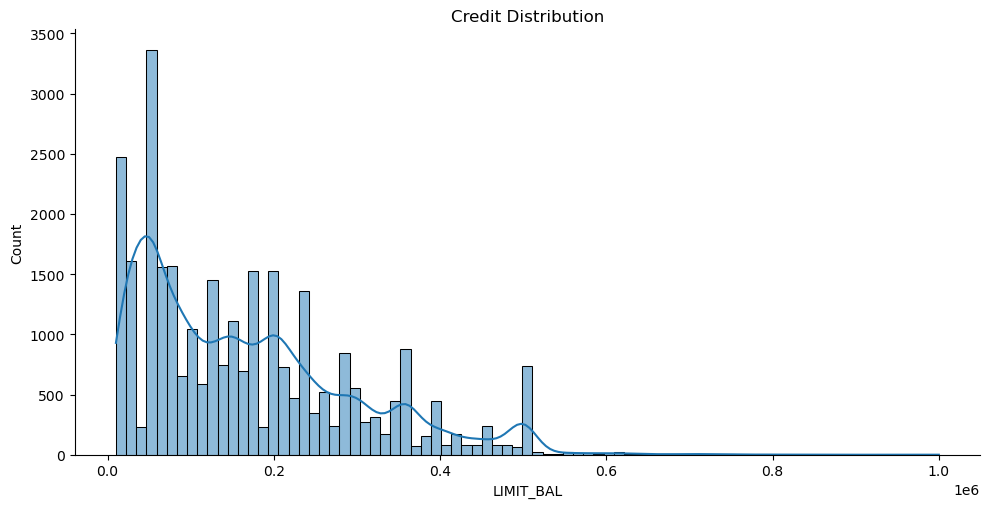

In [22]:
## Distribution plot of LIMIT_BAL
sns.displot(x='LIMIT_BAL', data = df, kde=True, aspect=2)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Credit Distribution")

<AxesSubplot:xlabel='Defaulter', ylabel='LIMIT_BAL'>

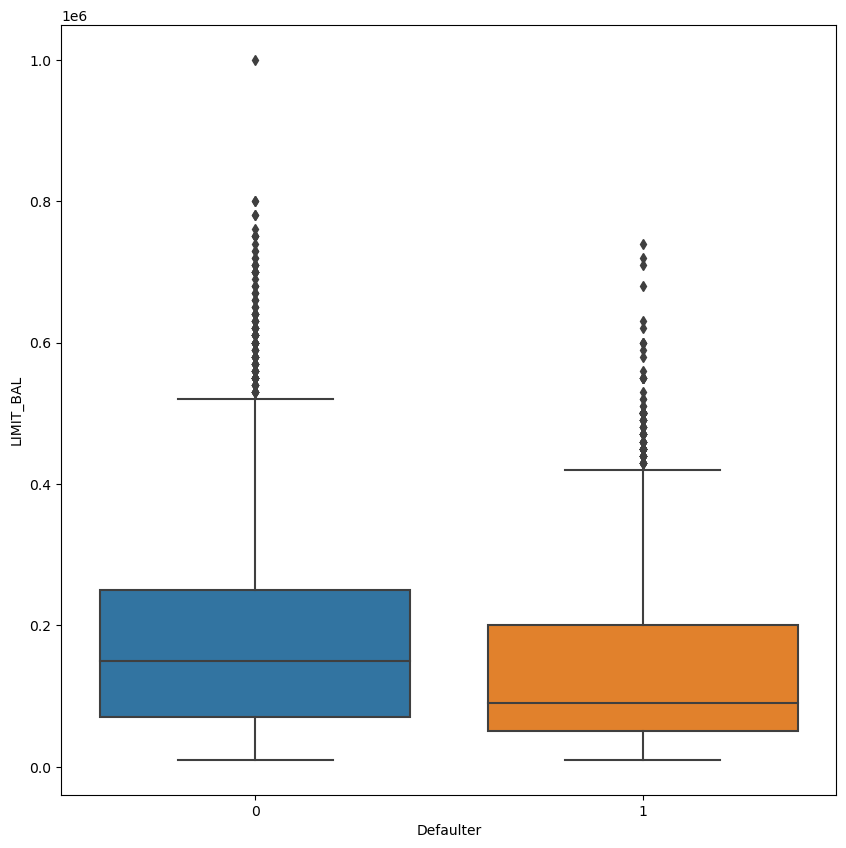

In [23]:
## Box plot 
plt.figure(figsize=(10,10))
sns.boxplot(x="Defaulter", y="LIMIT_BAL", data=df)

From our box plot above, we can see that generally, defaulters have lower mean credit balances than non-defaulters. (which makes sense because the higher the "chance" of you defaulting, the lower your credit balance -> is a cycle)

### Analysis on PAY_0 to PAY_6

In [24]:
# Lets see the value counts in column 'PAY_0'
df['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

Text(0.5, 1.0, 'Target Distribution')

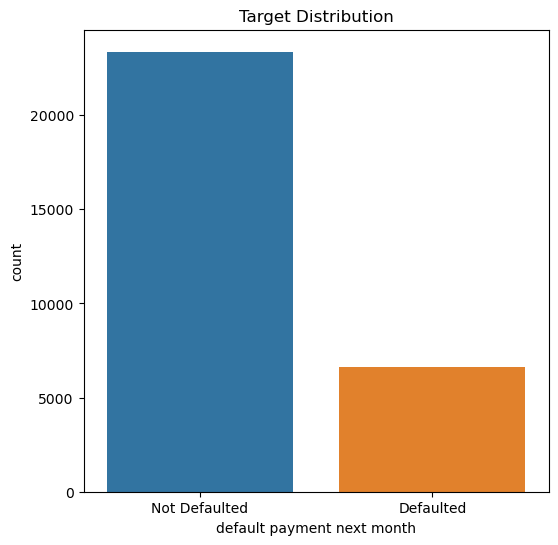

In [25]:
# Lets visualize the target column "default.payment.next.month"
plt.figure(figsize=(6,6))
sns.countplot(x='default payment next month', data=df)
plt.xticks([0,1], labels=["Not Defaulted", "Defaulted"])
plt.title("Target Distribution")

### Hypothesis Testing for all Attributes

We are carrying out a two-tailed test on each attribute to determine if that attribute is statistically significant in determining the outcome of default payment next month.

H0: The attribute is not statstically significant in predicting the outcome of default payment next month
H1: The attribute is statistically significant in predicitng the outcome of deault payment next month

In [29]:
numeric = df.select_dtypes(include=np.number).columns.tolist()
statsdf = pd.DataFrame()
for var in numeric:
    statsvalue = stats.ttest_ind(df.loc[df['default payment next month'] == 1, var], df.loc[df['default payment next month'] == 0, var])
    temp = pd.DataFrame([var, statsvalue[0], statsvalue[1]]).T
    temp.columns = ['Attribute', 'T-Value', 'P-Value']
    statsdf = pd.concat([statsdf, temp], axis = 0, ignore_index = True)

statsdf = statsdf.sort_values(by = 'P-Value').reset_index(drop = True)
statsdf

C:\Users\kaitl\AppData\Local\Temp\ipykernel_15260\4290954329.py:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  statsvalue = stats.ttest_ind(df.loc[df['default payment next month'] == 1, var], df.loc[df['default payment next month'] == 0, var])
C:\Users\kaitl\AppData\Local\Temp\ipykernel_15260\4290954329.py:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  statsvalue = stats.ttest_ind(df.loc[df['default payment next month'] == 1, var], df.loc[df['default payment next month'] == 0, var])


,Attribute,T-Value,P-Value
0,Defaulter,inf,0.0
1,default payment next month,inf,0.0
2,PAY_4,38.429754,0.0
3,PAY_0,59.478693,0.0
4,PAY_2,47.31986,0.0
5,PAY_3,41.922147,0.0
6,PAY_5,36.119125,0.0
7,PAY_6,32.945447,0.0
8,LIMIT_BAL,-26.908522,0.0
9,PAY_AMT1,-12.665063,0.0


At a 5% level of significance, we reject the null hypothesis for attributes with P-Value less than 0.05 and conclude that the attribute is statistically significant in predicting the outcome of default payment next month.